<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.166735,58.046139,0.001335,141.214210,141.213168,0.001042
1,0.0,1.0,60.592175,85.492196,-0.000987,156.083384,156.084465,-0.001081
2,0.0,2.0,95.317691,67.831605,-0.000414,173.148882,173.150074,-0.001191
3,0.0,3.0,99.420067,41.030202,0.002826,150.453095,150.451072,0.002023
4,0.0,4.0,47.856483,27.722772,-0.001050,85.578205,85.578952,-0.000747
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.811836,96.711941,-0.000241,151.523536,151.523869,-0.000333
249996,999.0,246.0,32.914753,64.740068,0.000348,107.655170,107.654950,0.000220
249997,999.0,247.0,66.938313,98.229318,-0.000807,175.166823,175.167650,-0.000826
249998,999.0,248.0,37.759495,44.542322,-0.003008,92.298809,92.301928,-0.003119


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.166735,58.046139,0.001335,141.214210,141.213168,0.001042
1,0.0,1.0,60.592175,85.492196,-0.000987,156.083384,156.084465,-0.001081
2,0.0,2.0,95.317691,67.831605,-0.000414,173.148882,173.150074,-0.001191
3,0.0,3.0,99.420067,41.030202,0.002826,150.453095,150.451072,0.002023
4,0.0,4.0,47.856483,27.722772,-0.001050,85.578205,85.578952,-0.000747
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.811836,96.711941,-0.000241,151.523536,151.523869,-0.000333
249996,999.0,246.0,32.914753,64.740068,0.000348,107.655170,107.654950,0.000220
249997,999.0,247.0,66.938313,98.229318,-0.000807,175.166823,175.167650,-0.000826
249998,999.0,248.0,37.759495,44.542322,-0.003008,92.298809,92.301928,-0.003119


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.166735  58.046139  0.001335  141.214210  141.213168  0.001042
      1.0    60.592175  85.492196 -0.000987  156.083384  156.084465 -0.001081
      2.0    95.317691  67.831605 -0.000414  173.148882  173.150074 -0.001191
      3.0    99.420067  41.030202  0.002826  150.453095  150.451072  0.002023
      4.0    47.856483  27.722772 -0.001050   85.578205   85.578952 -0.000747
...                ...        ...       ...         ...         ...       ...
999.0 245.0  44.811836  96.711941 -0.000241  151.523536  151.523869 -0.000333
      246.0  32.914753  64.740068  0.000348  107.655170  107.654950  0.000220
      247.0  66.938313  98.229318 -0.000807  175.166823  175.167650 -0.000826
      248.0  37.759495  44.542322 -0.003008   92.298809   92.301928 -0.003119
      249.0  86.532590  92.298847 -0.000374  188.831063  188.831391 -0.000328

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.166735  58.046139  0.001335  141.214210  141.213168  0.001042
      1.0    60.592175  85.492196 -0.000987  156.083384  156.084465 -0.001081
      2.0    95.317691  67.831605 -0.000414  173.148882  173.150074 -0.001191
      3.0    99.420067  41.030202  0.002826  150.453095  150.451072  0.002023
      4.0    47.856483  27.722772 -0.001050   85.578205   85.578952 -0.000747
...                ...        ...       ...         ...         ...       ...
999.0 245.0  44.811836  96.711941 -0.000241  151.523536  151.523869 -0.000333
      246.0  32.914753  64.740068  0.000348  107.655170  107.654950  0.000220
      247.0  66.938313  98.229318 -0.000807  175.166823  175.167650 -0.000826
      248.0  37.759495  44.542322 -0.003008   92.298809   92.301928 -0.003119
      249.0  86.532590  92.298847 -0.000374  188.831063  188.831391 -0.000328

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.166735,58.046139,0.001335,141.214210,141.213168,0.001042
1,0.0,1.0,60.592175,85.492196,-0.000987,156.083384,156.084465,-0.001081
2,0.0,2.0,95.317691,67.831605,-0.000414,173.148882,173.150074,-0.001191
3,0.0,3.0,99.420067,41.030202,0.002826,150.453095,150.451072,0.002023
4,0.0,4.0,47.856483,27.722772,-0.001050,85.578205,85.578952,-0.000747
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.811836,96.711941,-0.000241,151.523536,151.523869,-0.000333
249996,999.0,246.0,32.914753,64.740068,0.000348,107.655170,107.654950,0.000220
249997,999.0,247.0,66.938313,98.229318,-0.000807,175.166823,175.167650,-0.000826
249998,999.0,248.0,37.759495,44.542322,-0.003008,92.298809,92.301928,-0.003119


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.166735  58.046139  0.001335  141.214210  141.213168  0.001042
      1.0    60.592175  85.492196 -0.000987  156.083384  156.084465 -0.001081
      2.0    95.317691  67.831605 -0.000414  173.148882  173.150074 -0.001191
      3.0    99.420067  41.030202  0.002826  150.453095  150.451072  0.002023
      4.0    47.856483  27.722772 -0.001050   85.578205   85.578952 -0.000747
...                ...        ...       ...         ...         ...       ...
999.0 245.0  44.811836  96.711941 -0.000241  151.523536  151.523869 -0.000333
      246.0  32.914753  64.740068  0.000348  107.655170  107.654950  0.000220
      247.0  66.938313  98.229318 -0.000807  175.166823  175.167650 -0.000826
      248.0  37.759495  44.542322 -0.003008   92.298809   92.301928 -0.003119
      249.0  86.532590  92.298847 -0.000374  188.831063  188.831391 -0.000328

[250000 rows x 6 columns]

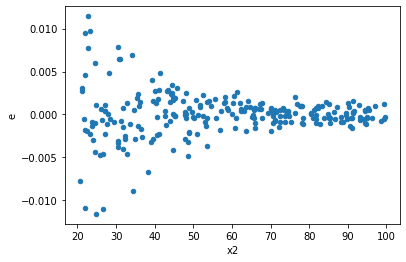

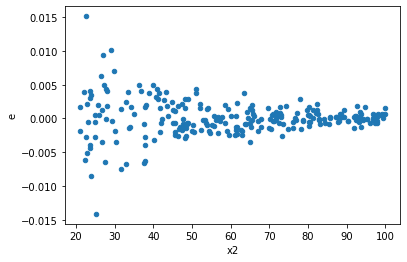

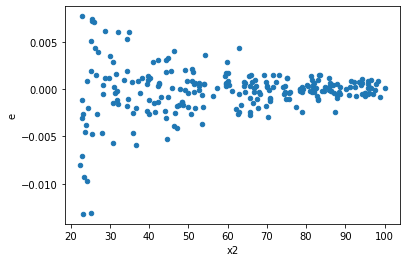

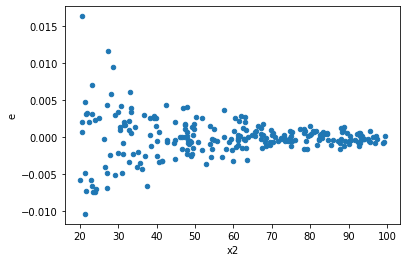

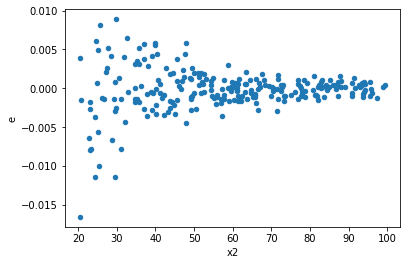

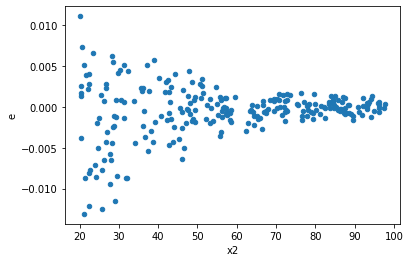

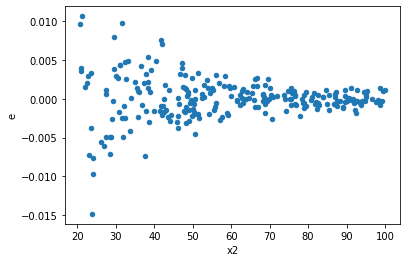

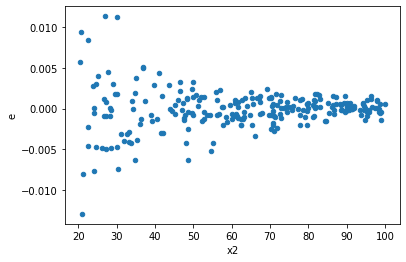

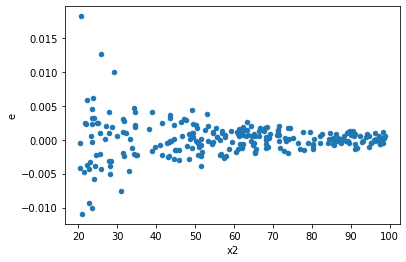

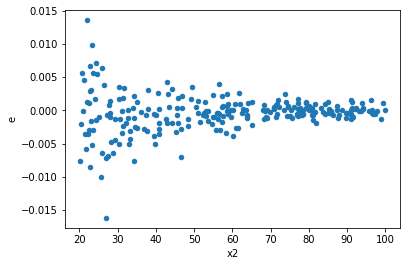

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.001197588066694668,0.00014463305245568243,1.2220286394843552e-05,1.4758474740375758e-06,0.12077028527419141,4.702363416684598e-22,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.0013393383277276927,0.000200543581296353,1.3666717629874415e-05,2.0463630744525817e-06,0.14973332513868481,1.5337694627923571e-18,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.001306597768077635,0.00016343118443727048,1.3332630286506479e-05,1.6676651473190867e-06,0.12508148140932673,1.8155514773259796e-21,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.0011947454569655395,0.00014787220086774408,1.219128017311775e-05,1.5089000088545314e-06,0.12376879108903714,1.210773561039142e-21,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.001262449009150744,0.00016931065001711676,1.2882132746436164e-05,1.7276596940522119e-06,0.13411286221454038,2.5706027289986262e-20,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.001803159761983996,0.00021424238435016743,1.839958940799996e-05,2.186146779083341e-06,0.11881497628054818,2.4980887616476574e-22,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.0012709351059307964,0.0001725593419217194,1.2968725570722413e-05,1.7608096114461163e-06,0.1357735270010831,4.083836768805306e-20,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.0010135704659930292,0.00019893518991304353,1.0342555775439073e-05,2.029950917480036e-06,0.19627169159683439,1.9790286034466648e-14,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.0012751921986034359,0.00012733060663880228,1.3012165291871795e-05,1.2992919044775742e-06,0.09985209035802768,2.5633300469906586e-25,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64